In [1]:
# Import Pandas, NumPy, RegEx, MatPlotLib, Seaborn and RF Regressor
# Set display option to show all columns
# Import raw CSV files

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = 100
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
# Inspect the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Get list of column names
test.columns

Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [4]:
# Check data types
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Inspect the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Get list of column names
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [7]:
# Check data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Convert 'Sex' to binary, numeric format

train.loc[train["Sex"] == "male", "Sex"] = 1
train.loc[train["Sex"] == "female", "Sex"] = 0
test.loc[test["Sex"] == "male", "Sex"] = 1
test.loc[test["Sex"] == "female", "Sex"] = 0

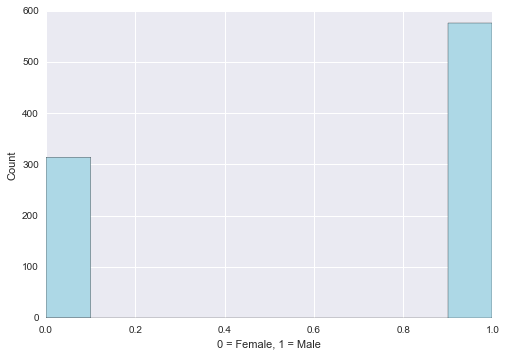

In [9]:
plt.hist(train.Sex, color='lightblue')
plt.xlabel('0 = Female, 1 = Male')
plt.ylabel('Count')

In [10]:
# Create empty column called 'Title' in each df
train['Title'] = ''
test['Title'] = ''

In [11]:
# Create variable named 'titles', append condensed categories of titles to new variable

titles = []

for name in train['Name'].values:
    if 'Mrs' in name:
        titles.append('Mrs')
    elif 'Miss' in name:
        titles.append('Miss')
    elif 'Jonkheer' in name:
        titles.append('Master')
    elif 'Master' in name:
        titles.append('Master')
    elif 'Ms' in name:
        titles.append('Miss')
    elif 'Mlle' in name:
        titles.append('Miss')
    elif 'Mme' in name:
        titles.append('Mrs')
    elif 'Capt' in name:
        titles.append('Sir')
    elif 'Don' in name:
        titles.append('Sir')
    elif 'Major' in name:
        titles.append('Sir')
    elif 'Col' in name:
        titles.append('Sir')
    elif 'Sir' in name:
        titles.append('Sir')
    elif 'Dona' in name:
        titles.append('Lady')
    elif 'Lady' in name:
        titles.append('Lady')
    elif 'Countess' in name:
        titles.append('Lady')
    elif 'Mr' in name:
        titles.append('Mr')
    else:
        titles.append('NaN')

In [12]:
# Turn new variable into Pandas Series and append it to original dataframe
titles = pd.Series(titles)
train['Title'] = titles

In [13]:
# Repeat above steps for test data

titles = []

for name in test['Name'].values:
    if 'Mrs' in name:
        titles.append('Mrs')
    elif 'Miss' in name:
        titles.append('Miss')
    elif 'Jonkheer' in name:
        titles.append('Master')
    elif 'Master' in name:
        titles.append('Master')
    elif 'Ms' in name:
        titles.append('Miss')
    elif 'Mlle' in name:
        titles.append('Miss')
    elif 'Mme' in name:
        titles.append('Mrs')
    elif 'Capt' in name:
        titles.append('Sir')
    elif 'Don' in name:
        titles.append('Sir')
    elif 'Major' in name:
        titles.append('Sir')
    elif 'Col' in name:
        titles.append('Sir')
    elif 'Sir' in name:
        titles.append('Sir')
    elif 'Dona' in name:
        titles.append('Lady')
    elif 'Lady' in name:
        titles.append('Lady')
    elif 'Countess' in name:
        titles.append('Lady')
    elif 'Mr' in name:
        titles.append('Mr')
    else:
        titles.append('NaN')

In [14]:
titles = pd.Series(titles)
test['Title'] = titles

In [15]:
# Impute the Embarked variable
train["Embarked"] = train["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].fillna("S")

In [16]:
# Create dummy variables for port of embarcation

train = pd.concat([train, pd.get_dummies(train['Embarked']).rename(columns=lambda x: 'Embarked_' + str(x))], axis=1)
test = pd.concat([test, pd.get_dummies(test['Embarked']).rename(columns=lambda x: 'Embarked_' + str(x))], axis=1)

In [17]:
# Replace Fare NAs with median value and cast as integer

train["Fare"].fillna(train["Fare"].median(), inplace=True)
test["Fare"].fillna(test["Fare"].median(), inplace=True)
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

In [18]:
print train.Age.isnull().sum()
print test.Age.isnull().sum()

177
86


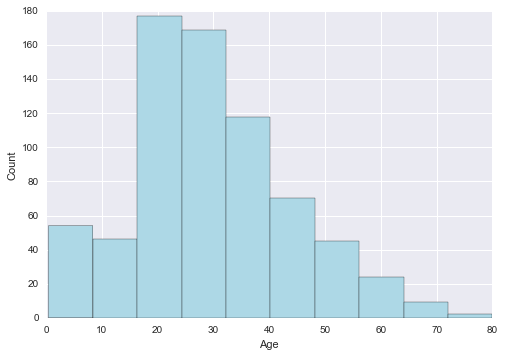

In [19]:
#Visualize ages in data set without NaNs

AgeDropNaN = train[train.Age.notnull()]
plt.hist(AgeDropNaN.Age, color = 'lightblue')
plt.ylabel('Count')
plt.xlabel('Age')

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7,NaN,S,Mr,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71,C85,C,Mrs,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7,NaN,S,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53,C123,S,Mrs,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8,NaN,S,Mr,0,0,1


In [21]:
### Populate missing ages using RandomForestRegressor
def setMissingAges(df):
    
    # Grab all the features that can be included in a Random Forest Regressor
    age_df = df[['Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    
    # Split into sets with known and unknown Age values
    knownAge = age_df.loc[ (df.Age.notnull()) ]
    unknownAge = age_df.loc[ (df.Age.isnull()) ]
    
    # All age values are stored in a target array
    y = knownAge.values[:, 0]
    
    # All the other values are stored in the feature array
    X = knownAge.values[:, 1::]
    
    # Create and fit a model
    rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rfr.predict(unknownAge.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age'] = predictedAges 
    
    return df

In [22]:
# Apply function
setMissingAges(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7,NaN,S,Mr,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71,C85,C,Mrs,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7,NaN,S,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53,C123,S,Mrs,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8,NaN,S,Mr,0,0,1
5,6,0,3,"Moran, Mr. James",1,21.173442,0,0,330877,8,NaN,Q,Mr,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51,E46,S,Mr,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21,NaN,S,Master,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11,NaN,S,Mrs,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30,NaN,C,Mrs,1,0,0


In [23]:
setMissingAges(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7,NaN,Q,Mr,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7,NaN,S,Mrs,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9,NaN,Q,Mr,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8,NaN,S,Mr,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12,NaN,S,Mrs,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.000000,0,0,7538,9,NaN,S,Mr,0,0,1
6,898,3,"Connolly, Miss. Kate",0,30.000000,0,0,330972,7,NaN,Q,Miss,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",1,26.000000,1,1,248738,29,NaN,S,Mr,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.000000,0,0,2657,7,NaN,C,Mrs,1,0,0
9,901,3,"Davies, Mr. John Samuel",1,21.000000,2,0,A/4 48871,24,NaN,S,Mr,0,0,1


In [24]:
train['AgeBins'] = pd.cut(train.Age, bins=[0,18,40,57,100], labels=['Child','Adult','Mature','Old'])
test['AgeBins'] = pd.cut(test.Age, bins=[0,18,40,57,100], labels=['Child','Adult','Mature','Old'])

In [25]:
TrainAgeGroups = pd.get_dummies(train['AgeBins']).rename(columns=lambda x: str(x))
train = pd.concat([train, TrainAgeGroups], axis=1)
TestAgeGroups = pd.get_dummies(test['AgeBins']).rename(columns=lambda x: str(x))
test = pd.concat([test, TestAgeGroups], axis=1)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Embarked_C,Embarked_Q,Embarked_S,AgeBins,Child,Adult,Mature,Old
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7,NaN,S,Mr,0,0,1,Adult,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71,C85,C,Mrs,1,0,0,Adult,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7,NaN,S,Miss,0,0,1,Adult,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53,C123,S,Mrs,0,0,1,Adult,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8,NaN,S,Mr,0,0,1,Adult,0,1,0,0


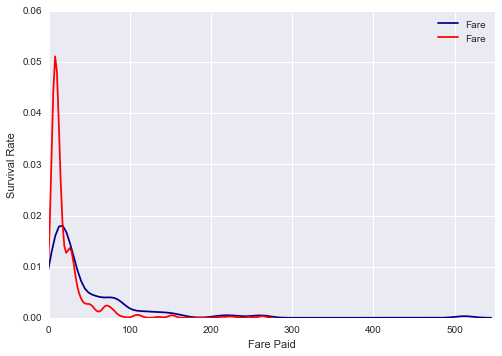

In [51]:
sns.kdeplot(train.loc[train['Survived'] == 1, 'Fare'], color = 'darkblue')
sns.kdeplot(train.loc[train['Survived'] == 0, 'Fare'], color = 'red')
plt.xlim([0, 550])
plt.xlabel('Fare Paid')
plt.ylabel('Survival Rate')

In [52]:
# Create fare bins (0-50, 51-200, 200 and up)

train['FareBins'] = pd.cut(train.Fare, bins=[0,50,200,1000], labels=[0, 1, 2])
test['FareBins'] = pd.cut(test.Fare, bins=[0,50,200,1000], labels=[0, 1, 2])

In [55]:
# Create binary features for each fare bin
farebins = pd.get_dummies(train['FareBins']).rename(columns=lambda x: 'Fare_' + str(x))
train = pd.concat([train, farebins], axis=1)
farebins = pd.get_dummies(test['FareBins']).rename(columns=lambda x: 'Fare_' + str(x))
test = pd.concat([test, farebins], axis=1)

In [57]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_C,Embarked_Q,Embarked_S,AgeBins,FareBins,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,CabinLetter,Fare_0,Fare_1,Fare_2
0,3,1,34.5,0,0,7,Mr,0,1,0,adult,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,0,47.0,1,0,7,Mrs,0,0,1,mature,0,1,0,0,0,0,0,0,0,0,1,0,0
2,2,1,62.0,0,0,9,Mr,0,1,0,old,0,1,0,0,0,0,0,0,0,0,1,0,0
3,3,1,27.0,0,0,8,Mr,0,0,1,adult,0,1,0,0,0,0,0,0,0,0,1,0,0
4,3,0,22.0,1,1,12,Mrs,0,0,1,adult,0,1,0,0,0,0,0,0,0,0,1,0,0


In [29]:
# Replace missing values with "NA"
train['Cabin'][train.Cabin.isnull()] = 'NA'

/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
test['Cabin'][test.Cabin.isnull()] = 'NA'

/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
# Create a feature for the deck
train['Deck'] = train['Cabin'].map(lambda x : re.compile("([a-zA-Z]+)").search(x).group())
train['Deck'] = pd.factorize(train['Deck'])[0]

In [32]:
# Create binary features for each deck
decks = pd.get_dummies(train['Deck']).rename(columns=lambda x: 'Deck_' + str(x))
train = pd.concat([train, decks], axis=1)

In [33]:
test['Deck'] = test['Cabin'].map(lambda x : re.compile("([a-zA-Z]+)").search(x).group())
test['Deck'] = pd.factorize(test['Deck'])[0]

In [34]:
# Create binary features for each deck
decks = pd.get_dummies(test['Deck']).rename(columns=lambda x: 'Deck_' + str(x))
test = pd.concat([test, decks], axis=1)

In [35]:
# Replace missing values with "NA"
train['Cabin'][train.Cabin.isnull()] = 'NA'
test['Cabin'][test.Cabin.isnull()] = 'NA'

/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [36]:
# create feature for the alphabetical part of the cabin number
train['CabinLetter'] = train['Cabin'].map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())

In [37]:
# convert the distinct cabin letters with incremental integer values
train['CabinLetter'] = pd.factorize(train['CabinLetter'])[0]

In [38]:
test['CabinLetter'] = test['Cabin'].map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())

In [39]:
test['CabinLetter'] = pd.factorize(test['CabinLetter'])[0]

In [40]:
train.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'Embarked', 'Deck'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'Embarked', 'Deck'], axis=1, inplace=True)

In [43]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [44]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_C,Embarked_Q,Embarked_S,AgeBins,FareBins,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,CabinLetter
0,0,3,1,22.0,1,0,7,Mr,0,0,1,adult,0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71,Mrs,1,0,0,adult,1,0,1,0,0,0,0,0,0,0,1
2,1,3,0,26.0,0,0,7,Miss,0,0,1,adult,0,1,0,0,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53,Mrs,0,0,1,adult,1,0,1,0,0,0,0,0,0,0,1
4,0,3,1,35.0,0,0,8,Mr,0,0,1,adult,0,1,0,0,0,0,0,0,0,0,0


In [42]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_C,Embarked_Q,Embarked_S,AgeBins,FareBins,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,CabinLetter
0,3,1,34.5,0,0,7,Mr,0,1,0,adult,0,1,0,0,0,0,0,0,0,0
1,3,0,47.0,1,0,7,Mrs,0,0,1,mature,0,1,0,0,0,0,0,0,0,0
2,2,1,62.0,0,0,9,Mr,0,1,0,old,0,1,0,0,0,0,0,0,0,0
3,3,1,27.0,0,0,8,Mr,0,0,1,adult,0,1,0,0,0,0,0,0,0,0
4,3,0,22.0,1,1,12,Mrs,0,0,1,adult,0,1,0,0,0,0,0,0,0,0


In [ ]:
# # Write to new CSV file
# train.to_csv('train_clean.csv')
# test.to_csv('test_clean.csv')